In [1]:
suppressPackageStartupMessages(library(stringr))
suppressPackageStartupMessages(library(DESeq2))
suppressPackageStartupMessages(library(RColorBrewer))
suppressPackageStartupMessages(library(limma))
suppressPackageStartupMessages(library(beeswarm))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(pheatmap))
suppressPackageStartupMessages(library(data.table))


#### Create sumstas for both run2 ans run3: 
run2 includes also  sex and age as covariates

In [2]:
uniqueids   = readLines('/nfs/lab/publicdata/1kg_snps/ALL.wgs.phase3_sites.uniqueids')
rsids       = readLines('/nfs/lab/publicdata/1kg_snps/ALL.wgs.phase3_sites.rsids')
uniquechrid = paste0("chr",uniqueids )

### Broad populations

In [23]:
homedir = '/nfs/lab/projects/pbmc_snATAC/analysis_v2/rasqual_eur/broad/'

In [24]:
setwd(homedir)
celltypes = c('b','mono','nk','t')

In [25]:
celltypes_broad = celltypes

In [26]:
RES = data.frame()
for (c in celltypes) {
tabname      = paste0(c, "/Results_run3_lead.tsv")
results      = read.table(tabname, header=T, stringsAsFactors = F)
    results$cell = c
    RES = rbind(RES, results)
    
    }

In [27]:
RES$exclude = RES$Sequencing_mapping_error_rate>0.1 | RES$Ref_allele_bias<0.2 | RES$Ref_allele_bias>0.8    


In [28]:
res_broad = RES

sum(!duplicated(res_broad$Feature[res_broad$flag_fdr10 & res_broad$exclude==FALSE]))

[1] 5908

In [29]:
np1 = nv1 = c()
for (cc in celltypes){

res        =  read.table(paste0( cc, "/Results_run3_all.tsv"), header=T, stringsAsFactors = F)
res        =  subset(res,res$rsID !="SKIPPED")
res$Q_value = 10^res$Log10_qval
np1[cc]     = sum(!duplicated(res$Feature))
nv1[cc]     = sum(!duplicated(res$rsID))

colnames(res)[colnames(res)=="rsID"]<- "varID"
colnames(res)[colnames(res)=="P_VAl"]<- "P_value"

res$exclude = res$Sequencing_mapping_error_rate>0.1 | res$Ref_allele_bias<0.2 | res$Ref_allele_bias>0.8    
res$Is_peak_caQTL  = res$Feature %in% RES$Feature[RES$flag_fdr10 & RES$cell==cc ]
res$rsID = rsids[match(res$varID,uniquechrid)]
res$rsID[is.na(res$rsID)]<-as.character(res$varID[is.na(res$rsID)])

write.table(res, paste0("/nfs/lab/projects/pbmc_snATAC/analysis_v2/summarized_caqtls/run3/", cc, "_caqtl_sumstats_run3.tsv"), sep="\t", quote=F, row.names=F)
    }

In [30]:
np1
nv1

b   mono     nk      t 
 45013 128198  51945  97382

b   mono     nk      t 
 78846 162639  88050 134399

### Fine populations

In [34]:
homedir = '/nfs/lab/projects/pbmc_snATAC/analysis_v2/rasqual_eur/fine/'
setwd(homedir)
celltypes   = list.files(homedir)[!grepl(".txt", list.files(homedir))]

In [35]:
celltypes_fine = celltypes

In [42]:
print(paste(celltypes_fine, collapse = "', '"))

[1] "act_cd4_t', 'adaptive_NK', 'cDC', 'cMono', 'cyto_cd8_t', 'cyto_nk', 'iMono', 'mem_b', 'mem_cd8_t', 'mkc', 'naive_b', 'naive_cd4_t', 'naive_cd8_t', 'ncMono', 'tReg"


In [33]:
RES = data.frame()
for (c in celltypes) {
tabname      = paste0(c, "/Results_run3_lead.tsv")
results      = read.table(tabname, header=T, stringsAsFactors = F)
    results$cell = c
    RES = rbind(RES, results)
    }

In [34]:
RES$exclude = RES$Sequencing_mapping_error_rate>0.1 | RES$Ref_allele_bias<0.2 | RES$Ref_allele_bias>0.8    

In [36]:
res_fine = RES
sum(!duplicated(res_fine$Feature[res_fine$flag_fdr10 & res_fine$exclude==FALSE]))

[1] 5272

In [37]:
np2 = nv2 = c()
for (cc in celltypes){

res        =  read.table(paste0( cc, "/Results_run3_all.tsv"), header=T, stringsAsFactors = F)
res        =  subset(res,res$rsID !="SKIPPED")
res$Q_value = 10^res$Log10_qval
np2[cc]     = sum(!duplicated(res$Feature))
nv2[cc]     = sum(!duplicated(res$rsID))

colnames(res)[colnames(res)=="rsID"]<- "varID"
colnames(res)[colnames(res)=="P_VAl"]<- "P_value"

res$exclude = res$Sequencing_mapping_error_rate>0.1 | res$Ref_allele_bias<0.2 | res$Ref_allele_bias>0.8    
res$Is_peak_caQTL  = res$Feature %in% RES$Feature[RES$flag_fdr10 & RES$cell==cc  ]
res$rsID = rsids[match(res$varID,uniquechrid)]
res$rsID[is.na(res$rsID)]<-as.character(res$varID[is.na(res$rsID)])

write.table(res, paste0("/nfs/lab/projects/pbmc_snATAC/analysis_v2/summarized_caqtls/run3/", cc, "_caqtl_sumstats_run3.tsv"), sep="\t", quote=F, row.names=F)
    }

In [38]:
numb = cbind(c(np1, np2),c( nv1, nv2))
colMeans(numb)

[1] 49396.47 80029.37

In [39]:
res_tot = rbind(res_broad, res_fine)

### Pseudobulk

In [40]:
setwd('/nfs/lab/projects/pbmc_snATAC/analysis_v2/rasqual_eur/bulk/')
RES      = read.table("bulk/Results_run3_lead.tsv", header=T, stringsAsFactors = F)
RES$cell = 'bulk'

In [41]:
RES$exclude = RES$Sequencing_mapping_error_rate>0.1 | RES$Ref_allele_bias<0.2 | RES$Ref_allele_bias>0.8    

In [42]:
cc = "bulk"
res        =  read.table(paste0( cc, "/Results_run3_all.tsv"), header=T, stringsAsFactors = F)
res        =  subset(res,res$rsID !="SKIPPED")
res$Q_value = 10^res$Log10_qval

colnames(res)[colnames(res)=="rsID"]<- "varID"
colnames(res)[colnames(res)=="P_VAl"]<- "P_value"

res$exclude = res$Sequencing_mapping_error_rate>0.1 | res$Ref_allele_bias<0.2 | res$Ref_allele_bias>0.8    
res$Is_peak_caQTL  = res$Feature %in% RES$Feature[RES$flag_fdr10 & RES$cell==cc  ]
res$rsID = rsids[match(res$varID,uniquechrid)]
res$rsID[is.na(res$rsID)]<-as.character(res$varID[is.na(res$rsID)])

write.table(res, paste0("/nfs/lab/projects/pbmc_snATAC/analysis_v2/summarized_caqtls/run3/", cc, "_caqtl_sumstats_run3.tsv"), sep="\t", quote=F, row.names=F)


In [43]:
sum(!duplicated(RES$Feature[RES$flag_fdr10 & RES$exclude==FALSE]))

[1] 4662

### Total

In [44]:
res_tot = rbind(res_tot, RES)

In [46]:
colnames(res_tot)[colnames(res_tot)=="rsID"]<- "varID"
res_tot$rsID = rsids[match(res_tot$varID,uniquechrid)]
res_tot$rsID[is.na(res_tot$rsID)]<-as.character(res_tot$varID[is.na(res_tot$rsID)])

In [47]:
setwd("/nfs/lab/projects/pbmc_snATAC/analysis_v2/summarized_caqtls/run3")

In [48]:
write.table(res_tot, "EUR_caqtl_leads_run3.tsv", sep="\t", quote=F, row.names=F)

In [49]:
table(res_tot$cell)


  act_cd4_t adaptive_NK           b        bulk         cDC       cMono 
      62196       17199       45013      194846       24092      116192 
 cyto_cd8_t     cyto_nk       iMono       mem_b   mem_cd8_t         mkc 
      46916       48776       35454       27930       28332       11892 
       mono     naive_b naive_cd4_t naive_cd8_t      ncMono          nk 
     128198       35363       49151       37433       54300       51945 
          t        tReg 
      97382       20769 

In [50]:
summary(res_tot$No_tested_SNPs)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   4.563   6.000 133.000 

In [51]:
summary(res_tot$No_tested_SNPs[res_tot$cell!="bulk"])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   4.469   6.000 133.000 

### check examples

In [52]:
examples = read.table('../../example_boxplots/snp_list.peaks.bed')

examples$snps  = paste0(examples$V1, ":" , examples$V3,":" )
examples$peaks = paste0(examples$V4, ":" , examples$V5 -1 ,"-" ,examples$V6) 

examples$CAT = c('private','private','private','private','divergent', 'divergent', 'coacc', 
'gwas', 'gwas', 'gwas','gwas','gwas','private','private','private','private','divergent')
examples$important = c(F,F,F,F,F,T,F,T,T,T,T,T,F,F,F,F,F)

In [53]:
exm = merge(examples[,7:10],res_tot[,c('Feature', 'rsID','P_VAl','flag_fdr10','cell')], by.x= 2, by.y=1, all.x=T)

In [54]:
exm = merge(examples[,7:10],res_tot[,c('Feature', 'rsID','P_VAl','flag_fdr10','cell', 'exclude')], by.x= 2, by.y=1, all.x=T)

In [55]:
exm$qtl_cell = exm$cell
exm$qtl_cell[exm$flag_fdr10==FALSE | exm$exclude==TRUE] <- "."

In [56]:
ag = aggregate(qtl_cell~peaks, exm, paste, collapse=",")

In [57]:
agm = merge(examples[,7:10], ag, by.x=2, by.y=1)

In [58]:
agm = agm[order(-agm$important,agm$CAT ),]

In [60]:
res_sig = subset(res_tot, flag_fdr10==T & exclude==FALSE)

In [61]:
sum(!duplicated(res_sig$Feature))

[1] 8168

In [62]:
sum(!duplicated(res_sig$Feature[res_sig$cell!="bulk"]))

[1] 6901

### Number of qtls vs cell number

In [63]:
clrs = read.table("/nfs/lab/projects/pbmc_snATAC/analysis_v2/peaks/color_scheme.tsv")

#clrs = rbind(clrs, matrix( c('#FF7F00', 'b','#A65628','nk','#A6D854','mono', '#756BB1', "t"), ncol=2, byrow=T))
clrs = rbind(clrs, matrix( c('orange2', 'b','tan4','nk','#7FC97F','mono', 'magenta4', "t"), ncol=2, byrow=T))


celln = read.table("/nfs/lab/projects/pbmc_snATAC/analysis_v2/peaks/pbmc1-15_clusterLabels.txt", 
                   row.names=1, sep="\t", header=T)  

fine = table(celln$sample, celln$fine_populations)
fine = fine [ -c(1,6,11), ]
fine_sum = colSums(fine)
broad = table(celln$sample, celln$broad_populations_2)
broad = broad [ -c(1,6,11), ]
broad_sum = colSums(broad)

In [64]:
dt = data.frame(cell_number = c(fine_sum,broad_sum ), celltypes= c(names(fine_sum) , names(broad_sum)))
dt = merge(dt, clrs, by=2)
qtls= as.data.frame(table(res_sig$cell))
dt = merge(dt, qtls, by=1 )
dt = dt[!duplicated(dt),]
dt$broad = FALSE
dt$broad[dt$celltypes %in% c('b','mono','nk','t')] = TRUE

In [65]:
dt

,celltypes,cell_number,V1,Freq,broad
,<chr>,<dbl>,<chr>,<int>,<lgl>
1,act_cd4_t,12103,#F781BF,1341,FALSE
2,adaptive_NK,732,#F1E2CC,41,FALSE
3,b,4720,orange2,666,TRUE
4,cDC,709,darkcyan,72,FALSE
5,cMono,17505,darkseagreen2,2941,FALSE
6,cyto_cd8_t,5939,#1F78B4,622,FALSE
7,cyto_nk,6338,#A65628,741,FALSE
8,iMono,2121,green4,42,FALSE
9,mem_b,1480,#FF7F00,163,FALSE


In [66]:
pdf("../../figures/Cell_numbers_vsqtls.pdf")
par(mfrow=c(1,2), pin=c(2,3))
plot(Freq~cell_number, dt, pch=c(21,24)[dt$broad+1], cex=1.5, bg = as.character(V1), 
     xlab = "#cells", ylab = "# caQTLs", las=1 , cex.axis=0.8)

plot.new()
legend("center", legend =clrs[,2], y.intersp = 0.75,
       pch=c(rep(21,17 ),rep(24,4)), cex=1.2, pt.bg=as.character(clrs[,1]) )
dev.off()

png 
  2

### Correlation of covariates

In [70]:
library(pheatmap)

In [245]:
setwd('/nfs/lab/projects/pbmc_snATAC/analysis_v2/figures/')

In [246]:
dir.create("correlation_covariates")

In [200]:
dir  = "/nfs/lab/projects/pbmc_snATAC/analysis_v2/rasqual_eur/"

In [254]:
for (reso in c( 'broad',  'fine', 'bulk')){
homedir = paste0(dir, reso)
celltypes   = list.files(homedir)[!grepl(".txt", list.files(homedir))]
    for (cell in celltypes){

outfile  = paste0('correlation_covariates/corr_',cell, ".pdf" )
cov      = read.table(paste0(dir, reso, "/", cell, "/covariates.", cell , ".txt"))
n        = ncol(cov)
known    = c("sizefact" ,"age", "sex", "PC1", "PC2", 'PC3', 'PC4')
colnames(cov)[c(1,(n-5):n)]<-known 
unknown  = colnames(cov)[(2:(n-6))]
co       = cor(cov)
co       = co[known ,unknown]

numb     = round(co,2)
numb[numb<0.1]<- ""

pheatmap(co, display_numbers = numb, cluster_rows = F, cellwidth = 30,cellheight = 15,main = cell,
         cluster_cols = F,fontsize_number = 8, 
         file =outfile )
}
}

In [244]:
getwd()

[1] "/nfs/lab/projects/pbmc_snATAC/analysis_v2/rasqual_eur/bulk"

### Venn diagram 

In [71]:
res_tot$signif = res_tot$flag_fdr10 & res_tot$exclude==FALSE

wide = spread(data = res_tot[,c('Feature', 'cell', 'signif')], key=cell, value =signif )

In [73]:
v = vennCounts (data.frame(fine=rowSums(wide[,celltypes_fine],na.rm=T)>0,
                 broad=rowSums(wide[,celltypes_broad],na.rm=T)>0,
                          bulk=wide[,"bulk"] ) )

palette = c(brewer.pal( 6, "Paired")[c(2,6)], "gray")


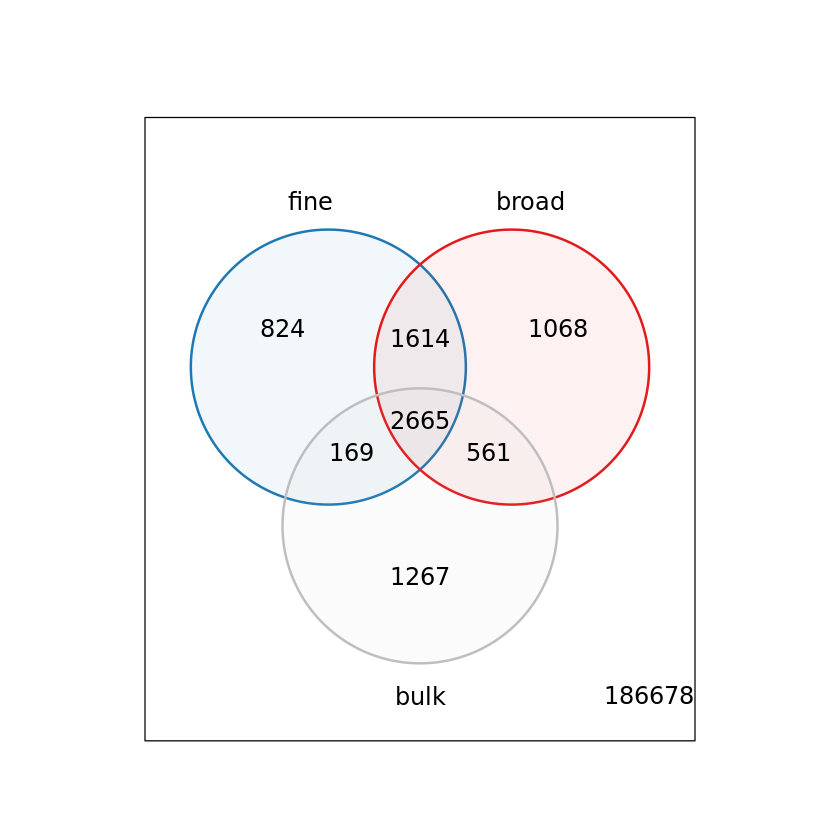

In [74]:
vennDiagram(v,circle.col = palette, lwd=2,  cex=1.2)

In [75]:
allcells =c("mono","t", "b", "nk" , celltypes)

In [76]:
pl =data.frame(sapply(allcells, function(c) data.frame( not_bulk=sum(rowSums(subset(wide[,c('bulk',c)], wide[,c]==T),na.rm=T )==1),
                                                    bulk=sum(rowSums(subset(wide[,c('bulk',c)], wide[,c]==T),na.rm=T )==2))))
p = matrix(unlist(pl), nrow=2)
colnames(p) = colnames(pl)
p = p[,order(-colSums(p))]

In [77]:
nms = colnames(p)
colnames(p)= NULL

In [78]:
tab = rowSums(wide[,celltypes],na.rm=T)
tab[tab>=6] = '6+'
b_micro=table(tab)[-1]
b_macro=table(rowSums(wide[,c("mono","t", "b", "nk")],na.rm=T))[-1]

In [79]:
getwd()

[1] "/nfs/lab/projects/pbmc_snATAC/analysis_v2/summarized_caqtls/run3"

In [80]:
pdf("/nfs/lab/projects/pbmc_snATAC/analysis_v2/figures/Summaries_forFig2_new.pdf")
par(xpd = TRUE)
layout(m =matrix(c(1,2,2,3,4,5,6,6,6), ncol=3, byrow = T))
vennDiagram(v,circle.col = palette, lwd=2,  cex=1.1)
par(mar=c(4,4,4,6))

bp<-barplot(p, col = palette[c(1,3)],las=2,
        legend.text = c("not bulk", "bulk"), ylab="#caQTLs", ylim=c(0,3500))
text(x=bp,y=0, adj = 1, labels=nms, srt = 45)

plot.new()
par(mar=c(4,4,4,4))
bp=barplot(b_micro,  las=1, ylab="#caQTLs", xlab="# cell types", ylim=c(0,4500) , col = palette[1])
text(x=bp,y=b_micro, labels=b_micro,pos = 3)


bp=barplot(b_macro,  las=1, ylab="#caQTLs", xlab="# cell types", ylim=c(0,5000) , col = palette[2])
text(x=bp,y=b_macro, labels=b_macro,pos = 3)
dev.off()

png 
  2

### Effect size correlations

manually do the pairwise calculations - select peak-snp that was caQTL in at least one of the two cells, remove duplicate peaks by keeping best snp of the first cell (in the second round - lower tri will be the second cells)

In [81]:
celltypes_sel = c('bulk', celltypes_fine)
l =length(celltypes_sel)

In [82]:
cormat = matrix(NA, ncol=l , nrow=l)
rownames(cormat)= colnames(cormat) = celltypes_sel

In [83]:
dir = '/nfs/lab/projects/pbmc_snATAC/analysis_v2/summarized_caqtls/run3'

In [84]:
setwd(dir)

In [85]:
res_tot$feature_snp = paste(res_tot$Feature, res_tot$varID, sep="_")
wideFDR = spread(data = res_tot[,c('feature_snp', 'cell', 'signif')], key=cell, value =signif )

In [86]:
col = colorRampPalette(brewer.pal(9, "Purples"))(20)
#col = colorRampPalette(brewer.pal(9, "Blues"))(20)

In [87]:
group = c(as.character(clrs[18:21,1]), "white",'#BC80BD')
names(group) = c(as.character(clrs[18:21,2]), "bulk", 'mkc')
colcol        = data.frame(group= c("bulk", "t" ,'nk', 'mono', 'mono', 't','nk','mono','b','t','mkc','b','t','t','mono','t'))
rownames(colcol) = colnames(cormat)

In [88]:
colist = list(group=group)

use the minumum p value instead

In [89]:
for(c1 in celltypes_sel){
    for(c2 in celltypes_sel){


a = fread(paste0(c1, "_caqtl_sumstats_run3.tsv"), header=T)
b = fread(paste0(c2, "_caqtl_sumstats_run3.tsv"), header=T)

a$feature_snp = paste(a$Feature, a$varID, sep="_")
b$feature_snp = paste(b$Feature, b$varID, sep="_")

m = merge(a[,c('feature_snp',"Feature","P_value" ,'Effect_size')] , b[,c('feature_snp','Effect_size',"P_value")], by="feature_snp")

sig = unique(na.omit(c(wideFDR$feature_snp[wideFDR[,c1]==TRUE], 
                       wideFDR$feature_snp[wideFDR[,c2]==TRUE] )))

m      = subset(m, feature_snp %in% sig)
m$minP = apply(m[,c("P_value.x", "P_value.y")],1,min)
m      = m[order(m$minP),]
m      = m [!duplicated(m$Feature),]

cormat[c1,c2] = suppressWarnings(cor.test(m$Effect_size.x, m$Effect_size.y, method = "spearman")$estimate)
        }
    }

In [90]:
write.csv(cormat, "corr_effects_mirror.csv")

In [91]:
cormat_nob = cormat[-1,-1]

In [92]:
pheatmap(cormat_nob, col=col, cellwidth = 10, cellheight = 10, annotation_col=colcol , annotation_colors =colist ,
         angle_col = 45,, annotation_row=colcol,
      file = "/nfs/lab/projects/pbmc_snATAC/analysis_v2/figures/heatmap_corr_effects_fig2.pdf"
          ,breaks = seq(0,1,0.05)
        )

In [93]:
summary(cormat[upper.tri(cormat_nob)]) 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.4322  0.5623  0.6156  0.6492  0.7253  1.0000 

In [ ]:
3841/5908

### How many independent SNPs are caQTLs?

In [1]:
setwd("/nfs/lab/projects/pbmc_snATAC/analysis_v2/summarized_caqtls/run3")

In [2]:
qtltot = read.csv("EUR_caqtl_leads_subset.csv")

In [3]:
sc = subset(qtltot, cell!="bulk")

In [7]:
inp= data.frame(SNP=unique(substring(sc$varID,4)) , P=0.5)

dim(inp)

write.table(inp, "lead_snps", quote=F, row.names=F)

In [ ]:
### on gatsby
plink \
--bfile /nfs/lab/1KGP/1KGP_ALL.merged \
--keep /nfs/lab/1KGP/1KGP.EUR.samples \
--exclude /nfs/lab/1KGP/1KGP_ALL.merged.dupvars \
--clump lead_snps \
--clump-field P \
--clump-r2 0.2 \
--clump-kb 250 \
--clump-p1 1 \
--clump-p2 1 \
--out leads_clumped



In [11]:
clumped = read.table('leads_clumped.clumped', header=T)

In [12]:
dim(clumped)

[1] 5829   12

In [13]:
sum(!duplicated(sc$Feature))

[1] 6916

In [14]:
sum(!duplicated(sc$Feature[sc$varID %in% paste0("chr", clumped$SNP)]))

[1] 5687

In [24]:
##Only bulk

In [15]:
bu = subset(qtltot, cell=="bulk")

In [16]:
write.table(data.frame(SNP=unique(substring(bu$varID,4)) , P=0.5), "lead_snps", quote=F, row.names=F)

In [17]:
clumped = read.table('leads_clumped.clumped', header=T)

In [18]:
sum(!duplicated(bu$Feature))

[1] 4703

In [19]:
sum(!duplicated(bu$Feature[bu$varID %in% paste0("chr", clumped$SNP)]))

[1] 4075